# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country_cd = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:

def city_data(city):  
    
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "appid": api_key,
        "q": city,
        "units":"imperial",       
    }
    resp = requests.get(base_url, params=params).json()
    
    name = resp["name"]
    clouds = resp['clouds']['all']
    country = resp['sys']['country']
    dt = resp['dt']
    humidity= resp['main']['humidity']
    lat = resp["coord"]['lat']
    lng = resp["coord"]['lon']
    max_temp = resp['main']['temp_max']
    speed = resp['wind']['speed']

    city_info_dict={
        "City": name,
        "Cloudiness": clouds,
        "Country": country,
        "Date": dt,
        "Humidity": humidity,
        "Lat": lat,
        "Lon": lng,
        "Max Temp": max_temp,
        "Windspeed": speed
    }
    return city_info_dict


In [105]:
#using data from city_data function and cities in cities list to create citi_info list; create data frame
city_info=[]
city_ctr = 0
print(f"Beginning Data Retrieval")
print(f"=" * 25)

for x in cities:
    print(f"Processing record {city_ctr} | {x}")
    #print(f"City name {x}, City number {city_ctr}")
    city_ctr +=1
    try: 
        city_info.append(city_data(x))
    except:
         print(f"{x} not found. Skipping...")

df = pd.DataFrame(city_info)
df

Beginning Data Retrieval
Processing record 0 | kapoeta
kapoeta not found. Skipping...
Processing record 1 | luganville
Processing record 2 | bilma
Processing record 3 | chokurdakh
Processing record 4 | vaitupu
vaitupu not found. Skipping...
Processing record 5 | rikitea
Processing record 6 | kayes
Processing record 7 | luderitz
Processing record 8 | vila velha
Processing record 9 | hermanus
Processing record 10 | mataura
Processing record 11 | ushuaia
Processing record 12 | poum
Processing record 13 | keti bandar
Processing record 14 | bengkulu
bengkulu not found. Skipping...
Processing record 15 | mandalgovi
Processing record 16 | busselton
Processing record 17 | uchiza
Processing record 18 | carnarvon
Processing record 19 | dikson
Processing record 20 | ribeira grande
Processing record 21 | bambous virieux
Processing record 22 | khudumelapye
Processing record 23 | jamestown
Processing record 24 | awbari
Processing record 25 | severo-kurilsk
Processing record 26 | chistogorskiy
Proces

Processing record 225 | tarbagatay
Processing record 226 | cabra
Processing record 227 | khani
Processing record 228 | broome
Processing record 229 | airai
Processing record 230 | saint-philippe
Processing record 231 | gazanjyk
Processing record 232 | svetlyy
svetlyy not found. Skipping...
Processing record 233 | asau
asau not found. Skipping...
Processing record 234 | cheney
Processing record 235 | jiroft
jiroft not found. Skipping...
Processing record 236 | tecoanapa
Processing record 237 | half moon bay
Processing record 238 | sturgis
Processing record 239 | dunedin
Processing record 240 | havoysund
Processing record 241 | inhambane
Processing record 242 | gravdal
Processing record 243 | shellbrook
Processing record 244 | verkhnevilyuysk
Processing record 245 | tasiilaq
Processing record 246 | buala
Processing record 247 | chumikan
Processing record 248 | faya
Processing record 249 | tulagi
tulagi not found. Skipping...
Processing record 250 | tumannyy
tumannyy not found. Skipping..

Processing record 448 | rypefjord
Processing record 449 | meulaboh
Processing record 450 | atbasar
Processing record 451 | amga
Processing record 452 | tessalit
Processing record 453 | tete
Processing record 454 | kununurra
Processing record 455 | beohari
Processing record 456 | kapit
Processing record 457 | peniche
Processing record 458 | manoel urbano
Processing record 459 | isangel
Processing record 460 | camacha
Processing record 461 | esperance
Processing record 462 | acapulco
Processing record 463 | laguna
Processing record 464 | saryshagan
saryshagan not found. Skipping...
Processing record 465 | ilhabela
Processing record 466 | male
Processing record 467 | brandon
Processing record 468 | agde
Processing record 469 | baindur
Processing record 470 | channel-port aux basques
Processing record 471 | presidencia roque saenz pena
Processing record 472 | kungurtug
Processing record 473 | okha
Processing record 474 | tuy hoa
Processing record 475 | terrace bay
Processing record 476 | k

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Windspeed
0,Luganville,75,VU,1563163213,74,-15.51,167.18,80.60,4.70
1,Bilma,73,NE,1563163213,16,18.69,12.92,90.45,5.23
2,Chokurdakh,100,RU,1563163213,66,70.62,147.90,42.57,13.98
3,Rikitea,64,PF,1563163214,86,-23.12,-134.97,74.61,13.65
4,Kayes,20,ML,1563163214,70,14.44,-11.44,86.00,10.29
5,Luderitz,0,NA,1563163213,93,-26.65,15.16,48.20,4.70
6,Vila Velha,40,BR,1563163214,78,-3.71,-38.60,86.00,9.17
7,Hermanus,0,ZA,1563163215,88,-34.42,19.24,51.01,1.99
8,Mataura,53,NZ,1563163215,77,-46.19,168.86,46.00,3.00
9,Ushuaia,40,AR,1563163215,86,-54.81,-68.31,37.40,3.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
df.to_csv(output_data_file)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Windspeed
0,Luganville,75,VU,1563163213,74,-15.51,167.18,80.60,4.70
1,Bilma,73,NE,1563163213,16,18.69,12.92,90.45,5.23
2,Chokurdakh,100,RU,1563163213,66,70.62,147.90,42.57,13.98
3,Rikitea,64,PF,1563163214,86,-23.12,-134.97,74.61,13.65
4,Kayes,20,ML,1563163214,70,14.44,-11.44,86.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

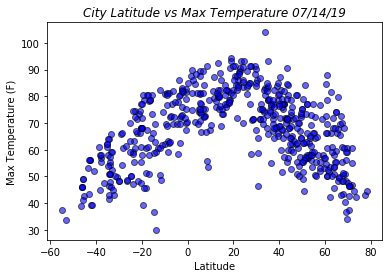

In [107]:

plt.scatter(df['Lat'],df['Max Temp'] , marker="o", c='Blue',alpha=0.6, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 07/14/19", fontsize=12, fontweight=0, style='italic' )

# Save figure
# Show plot
plt.savefig("output_data/temp_lat.png", bbox_inches='tight', pad_inches=0.5)
plt.show()


#### Latitude vs. Humidity Plot

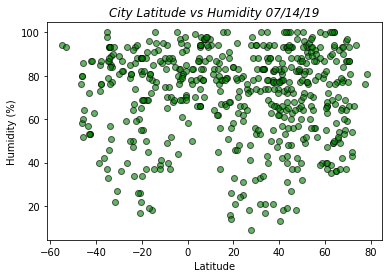

In [93]:
plt.scatter(df['Lat'],df['Humidity'] , marker="o", c='Green',alpha=0.6, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 07/14/19", fontsize=12, fontweight=0, style='italic' )

# Save figure
# Show plot
plt.savefig("output_data/humidity_lat.png", bbox_inches='tight', pad_inches=0.5)
plt.show()


#### Latitude vs. Cloudiness Plot

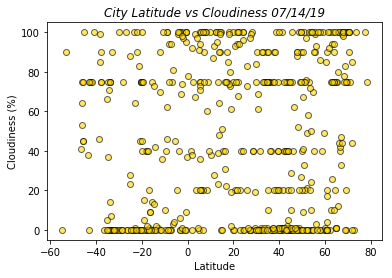

In [96]:
plt.scatter(df['Lat'], df['Cloudiness'] , marker="o", c='Gold',alpha=0.6, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness 07/14/19", fontsize=12, fontweight=0, style='italic' )

# Save figure
# Show plot
plt.savefig("output_data/cloudiness_lat.png", bbox_inches='tight', pad_inches=0.5)
plt.show()


#### Latitude vs. Wind Speed Plot

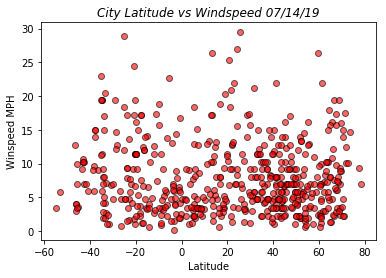

In [99]:
plt.scatter(df['Lat'],df['Windspeed'] , marker="o", c='red',alpha=0.6, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Winspeed MPH")
plt.title("City Latitude vs Windspeed 07/14/19", fontsize=12, fontweight=0, style='italic' )

# Save figure
# Show plot
plt.savefig("output_data/windspeed_lat.png", bbox_inches='tight', pad_inches=0.5)
plt.show()
